# Entri MOD 5 Assignment 3

### Importing Libraries

In [201]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#### Load the data

In [127]:
california_housing = fetch_california_housing()

#### Creating the dataframe

In [129]:
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseValue'] = california_housing.target


#### Data Explorations

In [131]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [132]:
df.shape

(20640, 9)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [134]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


#### Handling Missing Values

In [136]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [137]:
df.duplicated().sum()

0

#### Outliers

In [139]:
# Skewness value before outlier removal
df.skew().sort_values(ascending=True)

Longitude        -0.297801
HouseAge          0.060331
Latitude          0.465953
MedHouseValue     0.977763
MedInc            1.646657
Population        4.935858
AveRooms         20.697869
AveBedrms        31.316956
AveOccup         97.639561
dtype: float64

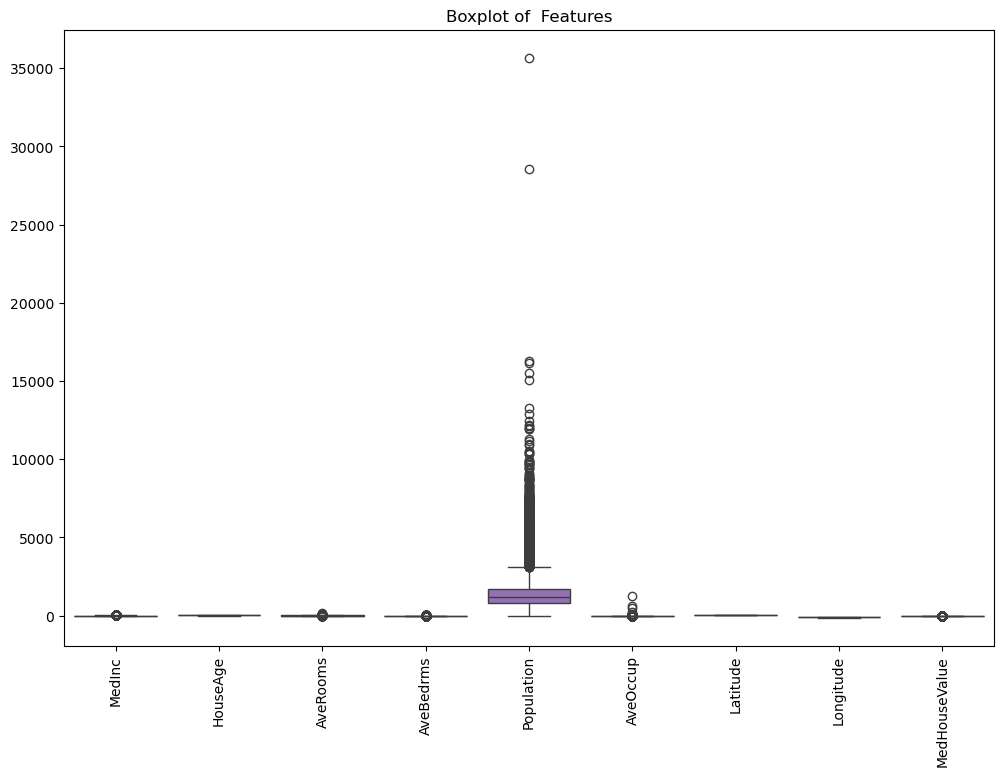

In [140]:
# boxplot before outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

In [141]:
#IQR method for outlier removal
def remove_outliers(df,columns):
  data_filtered=df.copy()

  for column in columns:
     Q1 = df[column].quantile(0.25)
     Q3 = df[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [142]:
new_data=remove_outliers(df,['MedInc','Population','AveRooms','AveBedrms','AveOccup'])

In [143]:
# Skewness value after outlier removal
new_data.skew().sort_values(ascending=True)

Longitude       -0.275190
HouseAge         0.009569
AveRooms         0.113327
AveBedrms        0.242424
AveOccup         0.334693
Latitude         0.418345
MedInc           0.545038
Population       0.731394
MedHouseValue    0.926549
dtype: float64

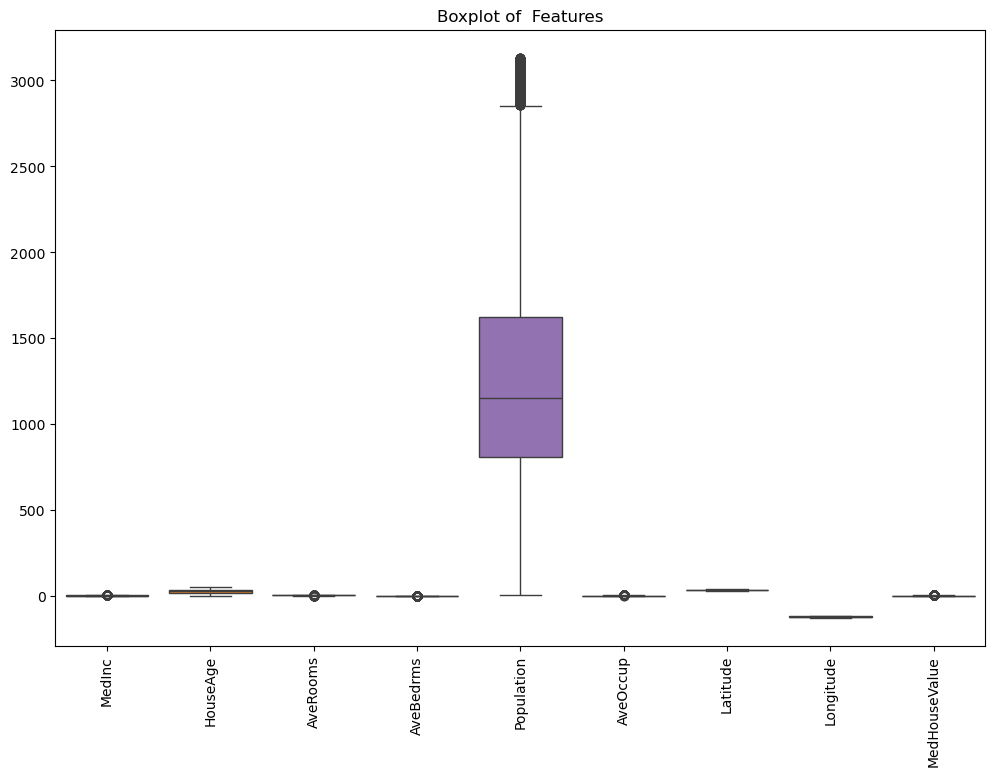

In [144]:
# boxplot after outlier removal
plt.figure(figsize=(12, 8))
sns.boxplot(new_data)
plt.xticks(rotation=90)
plt.title('Boxplot of  Features')
plt.show()

#### Split data

In [171]:
new_data_2 = new_data.copy()
X = new_data_2.drop('MedHouseValue',axis=1)
y = new_data_2['MedHouseValue']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13473, 8) (3369, 8) (13473,) (3369,)


#### Feature Scaling

In [175]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)


In [183]:

y_train_df = pd.DataFrame(y_train) #converting to data frame from series
scaler = StandardScaler()
scaler.fit(y_train_df)
y_train_scaled = scaler.transform(y_train_df)

#### Importance of data preprocessing and feature scaling

* At first the data is loaded and converted to dataframe for easy analyse.
* Then the data is explored for better understanding the data.
* In this case after clear exploration found that there are no null values and duplicates to remove.
* Next outlier detection and removal
* Then the data is scaled: it ensures that all features in a dataset are on a similar scale, preventing features with larger magnitudes from dominating the learning process and allowing algorithms to consider all features equally, ultimately leading to better model performance and faster convergence during training. 

### Regression Algorithm Implementation

In [203]:
models = {
    "Linear Regression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

In [205]:
model_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train_scaled)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    r2 = r2_score(y_test, predictions)
    model_results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

In [207]:
# Display model performance
for name, metrics in model_results.items():
    print(f"\n{name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Linear Regression Performance:
MAE: 111.2112
MSE: 12936.4941
RMSE: 113.7387
R2 Score: -11340.5856

DecisionTreeRegressor Performance:
MAE: 1.0998
MSE: 2.0503
RMSE: 1.4319
R2 Score: -0.7975

Random Forest Regressor Performance:
MAE: 0.7785
MSE: 1.0974
RMSE: 1.0476
R2 Score: 0.0379


* Here, The worst perfoming model is the linear regression due to the reasons:
1. Not capturing non-linear relationships in the data
2. Multicollinearity issue
* Decision Tree Regressor (Slightly Better, but Still Bad):
* Random Forest Regressor (Best Performance So Far)